# GROUP PROJECT - BIKE SHARING PREDICTION

##### PROPOSED BY THE A-TEAM

##### *Authors: Rayan Alghamdi, Timo Bachmann, Qing Loh, Francisco Paco Mansilla, Albert Sehnaoui, Wilhelm Robert Stahlke IV, Aliaa Zayed*


Link to Canva Presentation: https://www.canva.com/design/DAEKwxHcBh4/1idR27i5OXABKSnoZOqBgw/view?utm_content=DAEKwxHcBh4&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink


Task Description:

1. **Training of the whole data** 2011 and first 3 quarters of 2012

2. **Test data** of the 4th quarter of 2012 (do not use it to fit your models)

3. Target the total number of users **(cnt)**

4. **Error metric:** R2 score (scikit-learn's default for regression)

5. Features to use: at least the ones present in this data (except for cnt, casual, and registered)

Column Descriptions:

1. **instant**: record index

2. **dteday**: date

3. **hr**: hour (0 to 23)

4. **weathersit**: Weather situation

5. **temp**: Normalized temperature in Celsius. The values are divided to 41 (max)

6. **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

7. **hum**: Normalized humidity. The values are divided to 100 (max)

8. **windspeed**: Normalized wind speed. The values are divided to 67 (max)

9. **casual**: count of casual users

10. **registered**: count of registered users

11. **cnt**: count of total rental bikes including both casual and registered

# Libraries and Dataset Import

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

import pandas as pd
import numpy as np
import math
import datetime
import sklearn

from sklearn import preprocessing,metrics,linear_model,model_selection,impute,experimental,pipeline,linear_model,tree,ensemble,compose,decomposition

from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

from lxml import objectify

#! pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

import warnings
warnings.filterwarnings('ignore')

sklearn.set_config(display="diagram")

In [2]:
data = pd.read_csv("hour.csv", index_col=0, header=0)
data

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,1/1/2011,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16
2,1/1/2011,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40
3,1/1/2011,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32
4,1/1/2011,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13
5,1/1/2011,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17375,12/31/2012,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17376,12/31/2012,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17377,12/31/2012,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90


# Exploratory Data Analysis (descriptive analytics)

### - Ensuring data quality (correctness, consistency, missing values, outliers...)
### - Plotting clear and meaningful figures
### - Giving insights on what seems relevant for prediction and what does not

### - Bonus points for:
        Studying the influence of combinations of features (not just individual features).
        Checking possibly redundant variables via correlations

In [3]:
# Check column data types
data.dtypes

dteday         object
hr              int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Check stats of numerical columns
data.describe()

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.00000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.495907,0.47479,0.626387,0.189784,35.676218,153.786869,189.463088
std,6.914405,0.193639,0.17280,0.198870,0.122475,49.305030,151.357286,181.387599
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.33330,0.470000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.48480,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.62120,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.00000,6.000000,0.850700,367.000000,886.000000,977.000000


- Mean, min, max and relation to quartiles seem normal for “hr”, “temp”, “atemp”, “hum” seems normal

- The variables “windspeed”, “casual”, “registered” and “cnt” seem skewed

- Columns “weathersit”, “temp”, “atemp”, “hum” and “windspeed” have missing values.

In [5]:
# Check for nulls in columns
data.isnull().sum()

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

About 100 null values from each of the 5 columns.

In [7]:
# Check for rows with more than 1 null
data[data.isnull().sum(axis=1) > 1]

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
9151,2012-01-22,4,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.16,NaN,NaN,0.2836,1,1,2
10127,2012-03-03,0,NaN,0.36,NaN,0.93,0.0896,1,21,22
13684,2012-07-29,8,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.70,0.6515,NaN,NaN,37,90,127


- We wanted to see if any of the null values in each column overlapped in case we would need to do column specific imputer methods later on

- Only three rows have more than 1 null value, so the predictions should not be affected too strongly.

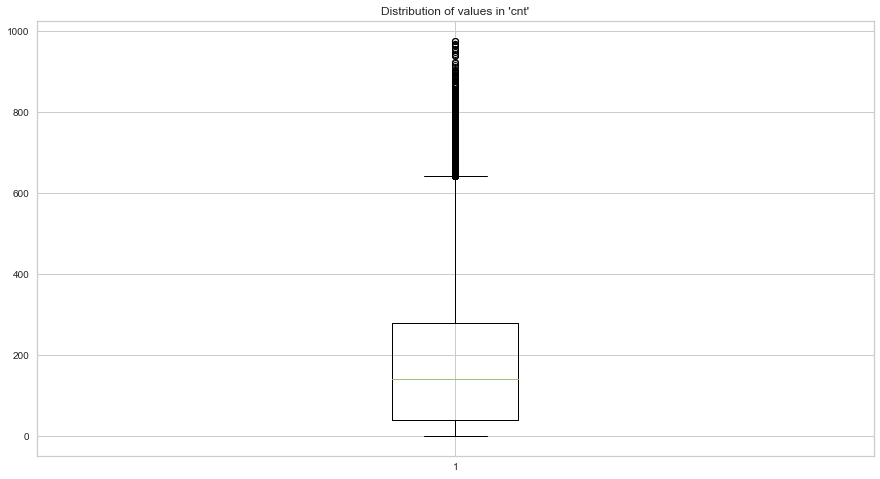

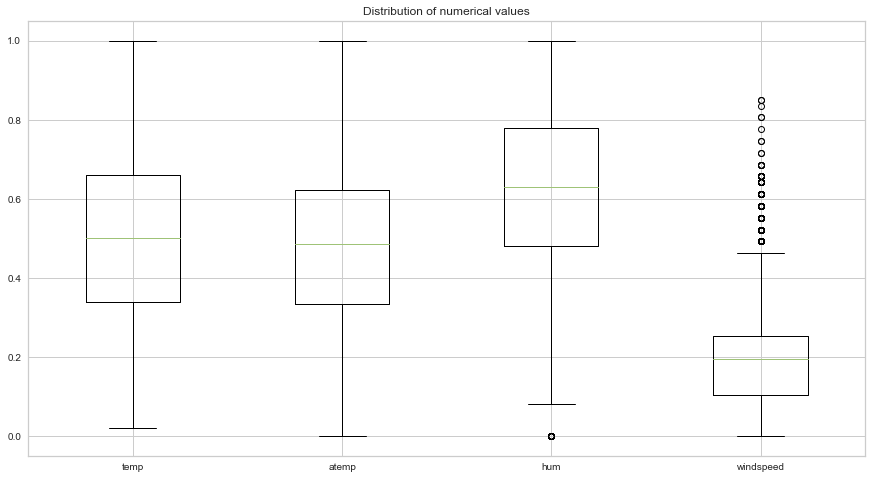

In [6]:
# Check for outliers

plt.figure(figsize=(15,8))
plt.boxplot(data['cnt'])
plt.title("Distribution of values in 'cnt'")
plt.show()

plt.figure(figsize=(15,8))
plt.boxplot([data['temp'].dropna(),data['atemp'].dropna(),data['hum'].dropna(),data['windspeed'].dropna()])
plt.xticks([1, 2, 3, 4], ['temp', 'atemp', 'hum', 'windspeed'])
plt.title("Distribution of numerical values")
plt.show()

In column "cnt", there are some rows with really high count of riders , however as column is "target" column, we will not edit anything.

Columns "hum" and "windspeed" have a few outliers, will consider methods to mitigate this during further analysis.

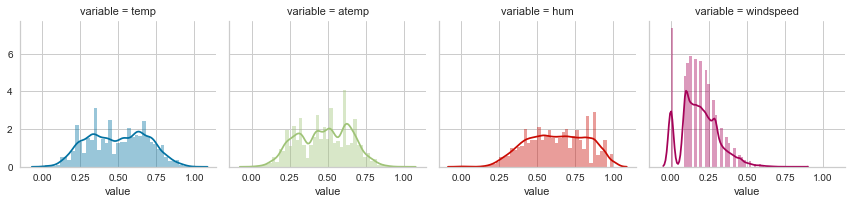

In [8]:
data2 = pd.melt(data.loc[:,['temp','atemp','hum','windspeed']])

data2["hue"] = data2["variable"].apply(lambda x: x[:1])

g = sns.FacetGrid(data2, col="variable", col_wrap=4, hue="hue")
g.map(sns.distplot, "value")

- The four columns "temp", "atemp", "hum" and "windspeed" seem to have gone through min max scaling per the column descriptions given

- From the distributions, it seems windspeed has a higher overall range in terms of density than the other columns.

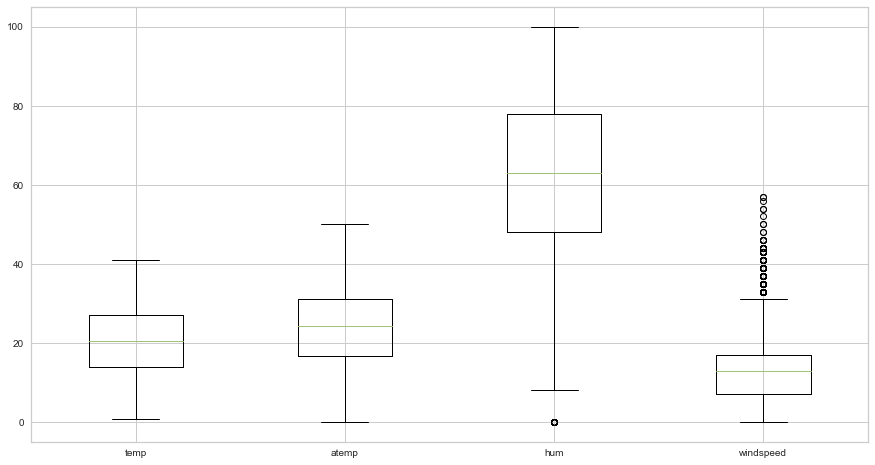

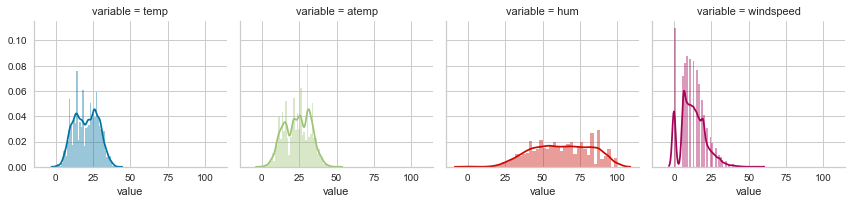

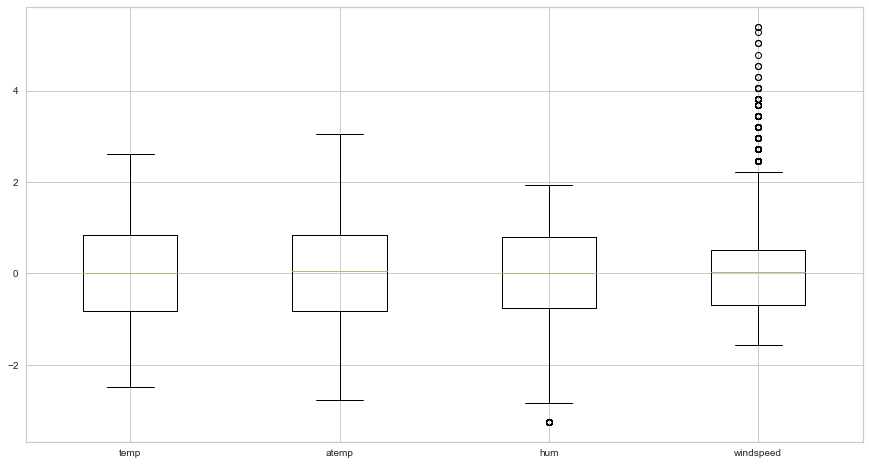

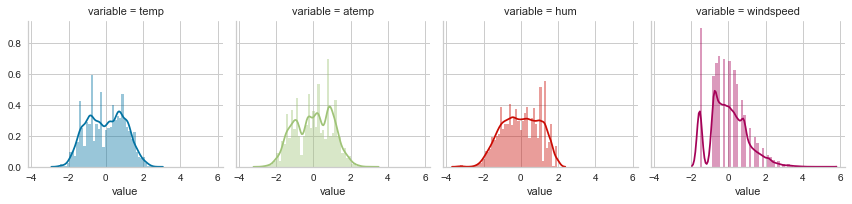

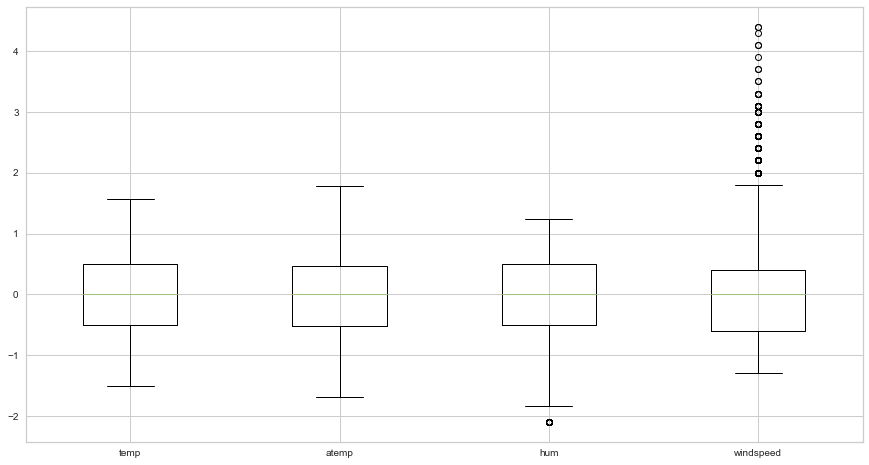

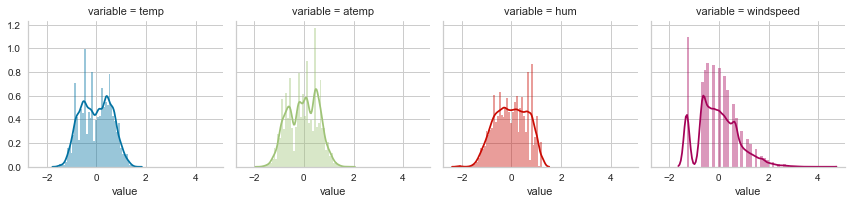

In [9]:
data2 = data.loc[:,['temp','atemp','hum','windspeed']]

# De-normalize columns "temp", "atemp", "hum" and "windspeed"
data2['temp'] = data2['temp']*41
data2['atemp'] = data2['atemp']*50
data2['hum'] = data2['hum']*100
data2['windspeed'] = data2['windspeed']*67

# Analysis of de-normalized data

# Outlier analysis
plt.figure(figsize=(15,8))
plt.boxplot([data2['temp'].dropna(),data2['atemp'].dropna(),data2['hum'].dropna(),data2['windspeed'].dropna()])
plt.xticks([1, 2, 3, 4], ['temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Distribution analysis
data2 = pd.melt(data2)
data2["hue"] = data2["variable"].apply(lambda x: x[:1])
g = sns.FacetGrid(data2, col="variable", col_wrap=4, hue="hue")
g.map(sns.distplot, "value")

# Analysis of standard scaled data

data2 = data.loc[:,['temp','atemp','hum','windspeed']]

scaler = StandardScaler()

data2['temp'] = scaler.fit_transform(data2[['temp']])
data2['atemp'] = scaler.fit_transform(data2[['atemp']])
data2['hum'] = scaler.fit_transform(data2[['hum']])
data2['windspeed'] = scaler.fit_transform(data2[['windspeed']])

# Outlier analysis
plt.figure(figsize=(15,8))
plt.boxplot([data2['temp'].dropna(),data2['atemp'].dropna(),data2['hum'].dropna(),data2['windspeed'].dropna()])
plt.xticks([1, 2, 3, 4], ['temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Distribution analysis
data2 = pd.melt(data2)
data2["hue"] = data2["variable"].apply(lambda x: x[:1])
g = sns.FacetGrid(data2, col="variable", col_wrap=4, hue="hue")
g.map(sns.distplot, "value")

# Analysis of robust scaled data

data2 = data.loc[:,['temp','atemp','hum','windspeed']]

scaler = RobustScaler(quantile_range=(25, 75))

data2['temp'] = scaler.fit_transform(data2[['temp']])
data2['atemp'] = scaler.fit_transform(data2[['atemp']])
data2['hum'] = scaler.fit_transform(data2[['hum']])
data2['windspeed'] = scaler.fit_transform(data2[['windspeed']])

# Outlier analysis
plt.figure(figsize=(15,8))
plt.boxplot([data2['temp'].dropna(),data2['atemp'].dropna(),data2['hum'].dropna(),data2['windspeed'].dropna()])
plt.xticks([1, 2, 3, 4], ['temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Distribution analysis
data2 = pd.melt(data2)
data2["hue"] = data2["variable"].apply(lambda x: x[:1])
g = sns.FacetGrid(data2, col="variable", col_wrap=4, hue="hue")
g.map(sns.distplot, "value")

While investigating the distribution, we decided to take a look at the differences if the data is scaled differently.

Normal data, standard scaled data and robust scaled data have all been analysed to try and find the best way to deal with the four numerical columns, especially "windspeed" as it has the most outliers as shown above.

The robust scaling method seems to have slightly minimized the range of values as x-axis of the distribution plots for the robust scaled numbers is smaller than the rest.

- For predictions, will keep the original scaling method as the different scaling methods are quite similar in terms of results

- However, the range of 0-1 in the original columns is aligned with the rest of the encoded data.

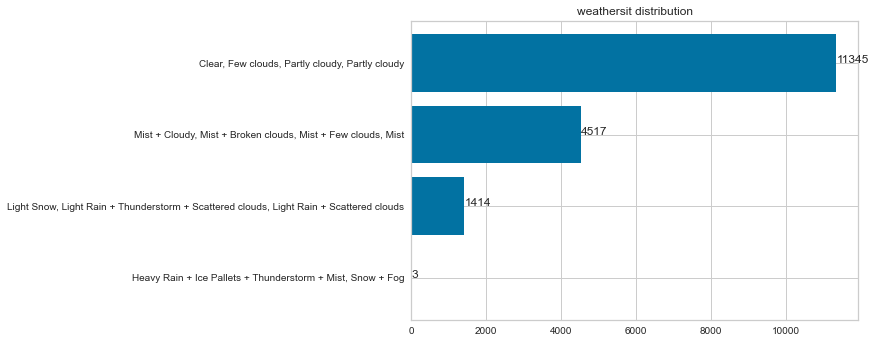

In [10]:
# Plot distribution of values "weathersit"
weathersit_count = pd.DataFrame(data.groupby('weathersit').size().to_frame('counts'))
weathersit_count = weathersit_count.sort_values('counts',ascending=True)
x = weathersit_count.index
y = weathersit_count.iloc[:,0]
plt.barh(x,y)

for i in range(len(x)):
    plt.annotate(str(y[i]), xy=(y[i],x[i]))

plt.title('weathersit distribution')    
plt.show()

- There seems to be quite a huge gap between "Clear" weather and the rest of the weather types. It would be interesting to see if "heavy rain" and "light snow" have a bigger impact on predicting the number of riders as these weather conditions do not happen as often.

- The four unique values in this column also seem to be increasing in level in terms of negative weather conditions, hence we should consider ordinal encoding during analysis.

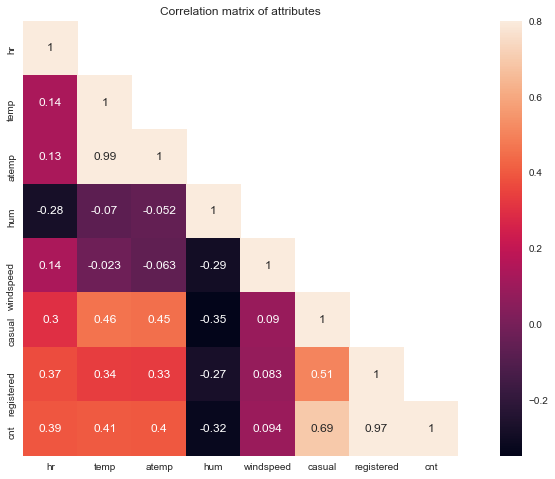

In [11]:
#Create the correlation matrix

CorrelationMatrix = data.corr()
mask = np.array(CorrelationMatrix)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes

fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(CorrelationMatrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

In a preliminary look at the correlations of all the variables, the 7 numerical columns were plotted on a correlation matrix.

1. First and foremost, the correlation of all values to "cnt" columns is investigated as "cnt" is the target variable we are trying to predict
    - There are extremely high correlations between "cnt" and columns "casual" and "registered". As the count is a sum of these 
      two columns, this is not surprising. For the rest of the analysis, only column "cnt" will be considered.
    - There is a huge negative correlation between "cnt" and "hum", so will include "hum" when predicting.
    - Columns "hr", "temp" and "atemp" are all highly correlated with "cnt" so it seems that these columns will be useful in predicting the number of riders.
    - "windspeed" does not seem to have a significant correlation with "cnt", so it can be discarded when predicting.


2. Next step is to investigate which variables are highly correlated with each other to avoid multicollinearity
    - At first glance, "temp" and "atemp can be seen to be highly correlated with each other. This is not surprising as "atemp" 
      is defined as "feeling temperature". "temp" will be kept for prediction as it has a slightly higher correlation with "cnt" compared to "atemp".
    - "hum" and "windspeed" seem to be quite negatively correlated but it is not high enough to discard one of the variables immediately. Therefore, both will be kept for prediction.

# Data Engineering

### - Discussion on missing values and outliers
### - Treatment of text and date features
### - Generation of extra features (e.g., season, yes/no holiday, hours of daylight, combinations of features, quantization/binarization, polynomial features)
### - Use of scikit-learn pipelines to perform transformations

We will try two different methods to deal with missing values:

1. Dropping all columns with nulls
2. Imputing missing numerical values with median and missing categorical values with mode

In [4]:
# 1. Drop all rows with nulls

data_cleaned_option1 = data[data.isnull().sum(axis=1) < 1]

#Check that all nulls were dropped successfully
data_cleaned_option1.isnull().sum()

dteday        0
hr            0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
# 2. Impute missing values of numerical columns with median

median = data.iloc[:,3:7].median()

data_cleaned_option2 = data.fillna({'temp': median[0], 'atemp': median[1], 'hum': median[2], 'windspeed': median[3]})

# Impute missing values of categorical column with mode

data_cleaned_option2['weathersit'] = data_cleaned_option2['weathersit'].fillna(data_cleaned_option2['weathersit'].mode()[0])

#Check that all nulls were imputed successfully
data_cleaned_option2.isnull().sum()

dteday        0
hr            0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Show diagram of data cleaning steps in option 2

numeric_features = ['temp','hum','windspeed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

categorical_features = ['weathersit']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)],remainder='passthrough')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['temp', 'hum', 'windspeed']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['weathersit'])])

Below, we attempted the ColumnTransformer function to do all the preprocessing steps written above. However, as the output of a ColumnTransformer removes the column names, and it would be inefficient to try and implement the code to obtain the column headers, we decided to simply show the ColumnTransformer object as a diagram of the preprocessing steps we did.

**We hope the next version of Python will remedy this issue.**

Next, we will apply the same data cleaning methods to the two differently cleaned data:

1. Convert column "dteday" to datetime format
2. Create columns "year", "quarter", "month", "dayofweek" from the "dteday" column
3. Create column "season" using Washington DC's definition of seasons, what months people considered summer, winter, spring and 
   autumn. This information is researched from the internet, source has been included.
4. Create column "sunlight" using Washington DC's daily sunrise and sunset times to determine which hours were light vs. which 
   hours were dark. This information is researched from the internet and another dataset is introduced, source has been 
   included.
5. Create "feeling" variable as difference between actual temperature ("temp") and feeling temperature ("atemp").
6. Create column "wind_influence" taking into account both "weathersit" and "windspeed".
7. One hot encode columns "weathersit", "season" and "feeling".
8. Columns "dteday", "casual", "registered", "atemp", "Sunrise", "Sunset", "Date" were dropped to get a leaner dataset.

#### 1. data_cleaned_option_1: dropping all columns with nulls

In [15]:
# 1. Convert column "dteday" to datetime format
data_cleaned_option1['dteday'] = pd.to_datetime(data_cleaned_option1['dteday'])

# 2. Create columns "year", "quarter", "month", "dayofweek"
data_cleaned_option1['year'] = pd.DatetimeIndex(data_cleaned_option1['dteday']).year
data_cleaned_option1['quarter'] = pd.DatetimeIndex(data_cleaned_option1['dteday']).quarter
data_cleaned_option1['month'] = pd.DatetimeIndex(data_cleaned_option1['dteday']).month
data_cleaned_option1['dayofweek'] = pd.DatetimeIndex(data_cleaned_option1['dteday']).weekday
#data['year_quarter'] = data['year'].astype(str) + data['quarter'].astype(str)

# 3. Create column "season"
    # Researched seasonal climates in Washington DC
    # https://www.weather-us.com/en/district-of-columbia-usa/washington-climate#:~:text=The%20best%20time%20to%20visit%20Washington%2C%20D.C.%20is%20the%20spring,the%20winter%20chill%20is%20absent.
    # Winter: Dec to Feb
    # Spring: Mar to May
    # Summer: Jun to Aug
    # Autumn: Sep to Nov

conditions = [
    ((data_cleaned_option1['month'] == 12) | (data_cleaned_option1['month'] < 3)),
    (data_cleaned_option1['month'] > 2) & (data_cleaned_option1['month'] <= 5),
    (data_cleaned_option1['month'] > 5) & (data_cleaned_option1['month'] <= 8),
    ((data_cleaned_option1['month'] > 8) & (data_cleaned_option1['month'] <= 11))
    ]

values = ['winter', 'spring', 'summer', 'autumn']

data_cleaned_option1['season'] = np.select(conditions, values)

# 4. Create column "sunlight":
    # Researched daily sunrise and sunset times in Washington DC from Jan 2011 - Dec 2012
    # https://www.timeanddate.com/sun/usa/washington-dc?month=12&year=2012

sunlight_data = pd.read_csv("Sunrise_Sunset data.csv", header=0) # New dataset introduced regarding sunrise and sunset times

sunlight_data['Date'] = pd.to_datetime(sunlight_data['Date'])
data_cleaned_option1 = data_cleaned_option1.merge(sunlight_data, how='left', left_on=["dteday"], right_on=["Date"])
data_cleaned_option1['daylight'] = np.where(np.logical_and(data_cleaned_option1['hr']>=data_cleaned_option1.iloc[:,-2],data_cleaned_option1['hr']<=data_cleaned_option1.iloc[:,-1]), 1, 0)

#5. Create "feeling" variable as difference between actual temperature ("temp") and feeling temperature ("atemp")

data_cleaned_option1['feeling'] = data_cleaned_option1['temp'] - data_cleaned_option1['atemp']
data_cleaned_option1['feeling'] = np.where(data_cleaned_option1['feeling'] >= 0, "feels_warmer", "feels_colder")

# 6. Create column "wind_influence" taking into account both "weathersit" and "windspeed"

conditions = [
    (data_cleaned_option1['weathersit'] == 'Clear, Few clouds, Partly cloudy, Partly cloudy'),
    (data_cleaned_option1['weathersit'] == 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
    (data_cleaned_option1['weathersit'] == 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'),
    (data_cleaned_option1['weathersit'] == 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')]

values = [1,2,3,4]

# Replace values "1", "2", "3" and "4" for the four different "weathersit" values to order them in order of good to bad weather
data_cleaned_option1['weather_enc'] = np.select(conditions, values)

# Assign value 1 to all windspeeds of 0.25 and higher
data_cleaned_option1['windspeed_enc'] = np.where(data_cleaned_option1['windspeed'] >= 0.25, 1, 0)

data_cleaned_option1['wind_influence'] = data_cleaned_option1['weather_enc']*data_cleaned_option1['windspeed_enc']

# 7. One hot encode columns "weathersit" and "season"

data_cleaned_option1 = pd.get_dummies(data_cleaned_option1,columns=['weathersit','season','feeling'])

# 8. Drop columns "dteday", "casual", "registered", "atemp", "Sunrise", "Sunset", "Date"

data_cleaned_option1 = data_cleaned_option1.drop(columns=['dteday','casual','registered','atemp','Sunrise','Sunset','Date'])

data_cleaned_option1.head()

,hr,temp,hum,windspeed,cnt,year,quarter,month,dayofweek,daylight,...,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_autumn,season_spring,season_summer,season_winter,feeling_feels_colder,feeling_feels_warmer
0,0,0.24,0.81,0.0,16,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
1,1,0.22,0.80,0.0,40,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
2,2,0.22,0.80,0.0,32,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
3,3,0.24,0.75,0.0,13,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
4,4,0.24,0.75,0.0,1,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0


#### 2. data_cleaned_option2: impute numerics by median and categorical by mode

In [16]:
# 1. Convert column "dteday" to datetime format
data_cleaned_option2['dteday'] = pd.to_datetime(data_cleaned_option2['dteday'])

# 2. Create columns "year", "quarter", "month", "dayofweek"
data_cleaned_option2['year'] = pd.DatetimeIndex(data_cleaned_option2['dteday']).year
data_cleaned_option2['quarter'] = pd.DatetimeIndex(data_cleaned_option2['dteday']).quarter
data_cleaned_option2['month'] = pd.DatetimeIndex(data_cleaned_option2['dteday']).month
data_cleaned_option2['dayofweek'] = pd.DatetimeIndex(data_cleaned_option2['dteday']).weekday
#data['year_quarter'] = data['year'].astype(str) + data['quarter'].astype(str)

# 3. Create column "season"
    # Researched seasonal climates in Washington DC
    # https://www.weather-us.com/en/district-of-columbia-usa/washington-climate#:~:text=The%20best%20time%20to%20visit%20Washington%2C%20D.C.%20is%20the%20spring,the%20winter%20chill%20is%20absent.
    # Winter: Dec to Feb
    # Spring: Mar to May
    # Summer: Jun to Aug
    # Autumn: Sep to Nov

conditions = [
    ((data_cleaned_option2['month'] == 12) | (data_cleaned_option2['month'] < 3)),
    (data_cleaned_option2['month'] > 2) & (data_cleaned_option2['month'] <= 5),
    (data_cleaned_option2['month'] > 5) & (data_cleaned_option2['month'] <= 8),
    ((data_cleaned_option2['month'] > 8) & (data_cleaned_option2['month'] <= 11))
    ]

values = ['winter', 'spring', 'summer', 'autumn'] # Already created above

data_cleaned_option2['season'] = np.select(conditions, values)

# 4. Create column "sunlight":
    # Researched daily sunrise and sunset times in Washington DC from Jan 2011 - Dec 2012
    # https://www.timeanddate.com/sun/usa/washington-dc?month=12&year=2012

#sunlight_data = pd.read_csv("Sunrise_Sunset data.csv", header=0) # Already imported above

#sunlight_data['Date'] = pd.to_datetime(sunlight_data['Date']) # Already converted above
data_cleaned_option2 = data_cleaned_option2.merge(sunlight_data, how='left', left_on=["dteday"], right_on=["Date"])
data_cleaned_option2['daylight'] = np.where(np.logical_and(data_cleaned_option2['hr']>=data_cleaned_option2.iloc[:,-2],data_cleaned_option2['hr']<=data_cleaned_option2.iloc[:,-1]), 1, 0)

#5. Create "feeling" variable as difference between actual temperature ("temp") and feeling temperature ("atemp")

data_cleaned_option2['feeling'] = data_cleaned_option2['temp'] - data_cleaned_option2['atemp']
data_cleaned_option2['feeling'] = np.where(data_cleaned_option2['feeling'] >= 0, "feels_warmer", "feels_colder")

# 6. Create column "wind_influence" taking into account both "weathersit" and "windspeed"

conditions = [
    (data_cleaned_option2['weathersit'] == 'Clear, Few clouds, Partly cloudy, Partly cloudy'),
    (data_cleaned_option2['weathersit'] == 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
    (data_cleaned_option2['weathersit'] == 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'),
    (data_cleaned_option2['weathersit'] == 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')]

values = [1,2,3,4]

# Replace values "1", "2", "3" and "4" for the four different "weathersit" values to order them in order of good to bad weather
data_cleaned_option2['weather_enc'] = np.select(conditions, values)

# Assign value 1 to all windspeeds of 0.25 and higher
data_cleaned_option2['windspeed_enc'] = np.where(data_cleaned_option2['windspeed'] >= 0.25, 1, 0)

data_cleaned_option2['wind_influence'] = data_cleaned_option2['weather_enc']*data_cleaned_option2['windspeed_enc']

# 5. One hot encode columns "weathersit" and "season"

data_cleaned_option2 = pd.get_dummies(data_cleaned_option2,columns=['weathersit','season','feeling'])

# 6. Drop columns "dteday", "casual", "registered", "atemp", "Sunrise", "Sunset", "Date"

data_cleaned_option2 = data_cleaned_option2.drop(columns=['dteday','casual','registered','atemp','Sunrise','Sunset','Date'])

data_cleaned_option2.head()

,hr,temp,hum,windspeed,cnt,year,quarter,month,dayofweek,daylight,...,"weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy","weathersit_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog","weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",season_autumn,season_spring,season_summer,season_winter,feeling_feels_colder,feeling_feels_warmer
0,0,0.24,0.81,0.0,16,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
1,1,0.22,0.80,0.0,40,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
2,2,0.22,0.80,0.0,32,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
3,3,0.24,0.75,0.0,13,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0
4,4,0.24,0.75,0.0,1,2011,1,1,5,0,...,1,0,0,0,0,0,0,1,1,0


A correlation matrix is created again for both types of differently cleaned data to do one more round of feature selection before modelling.

#### 1. data_cleaned_option_1: dropping all columns with nulls

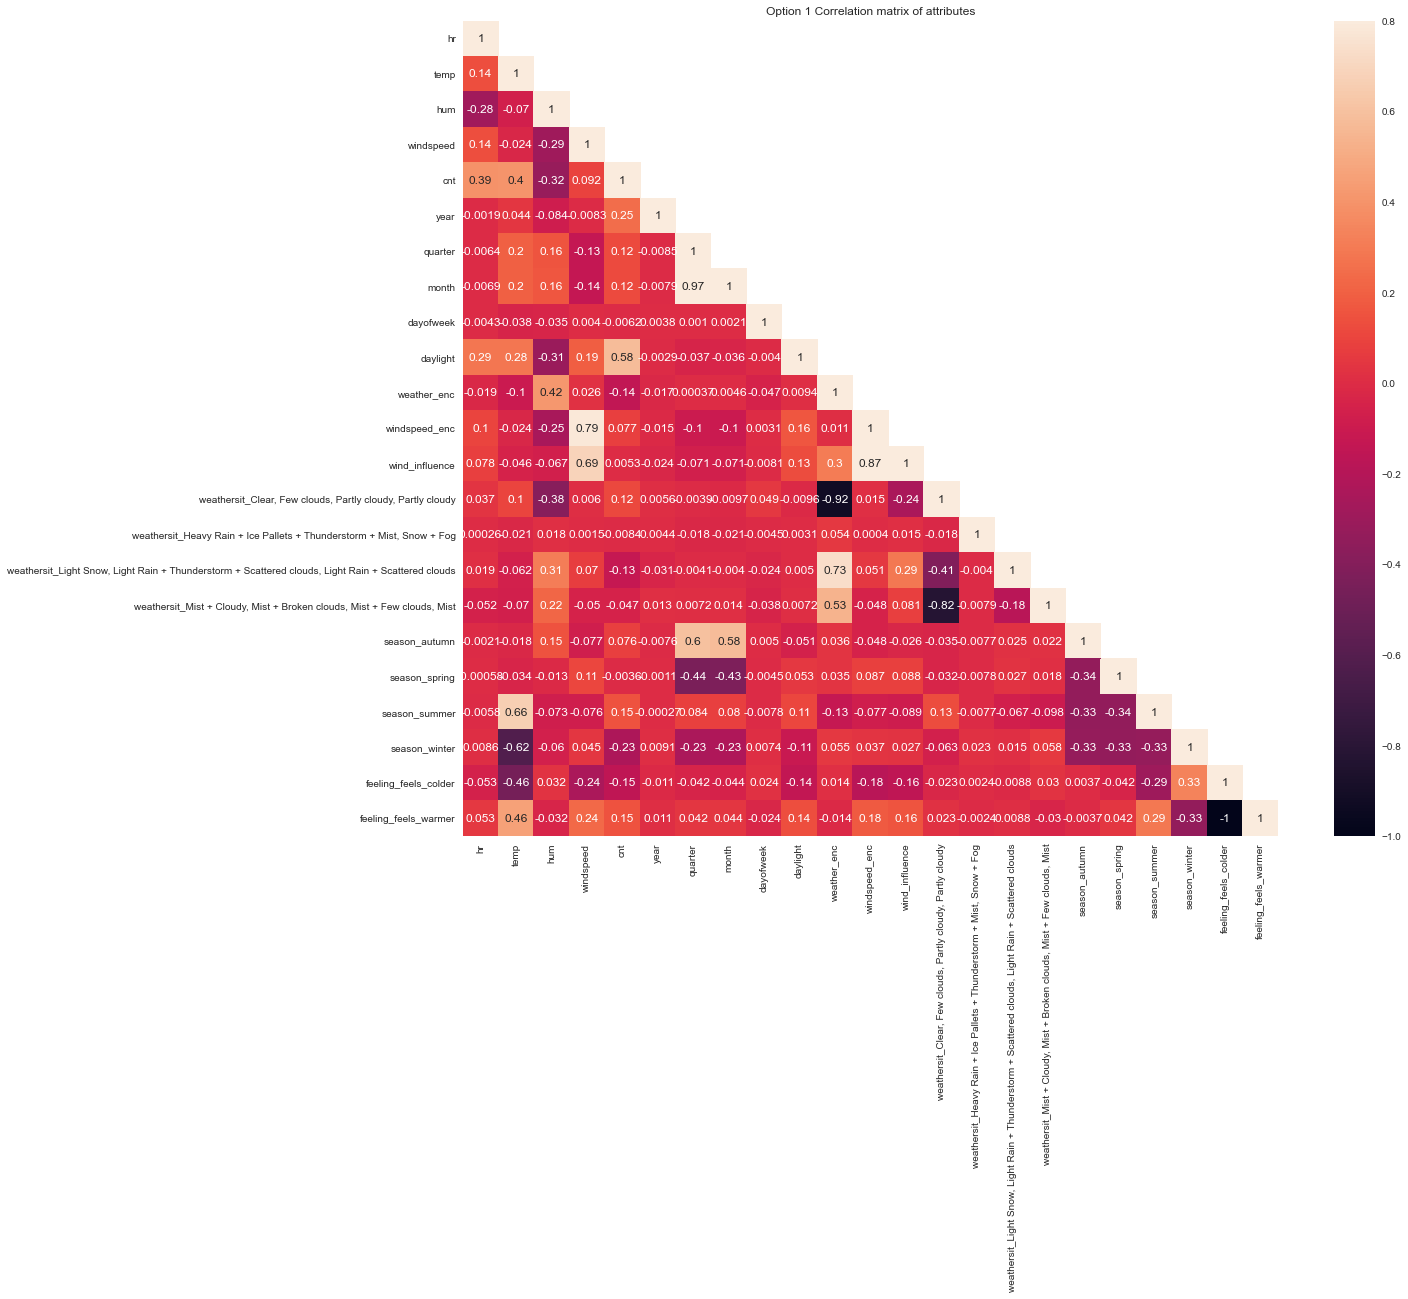

In [17]:
#Create the correlation matrix

CorrelationMatrix = data_cleaned_option1.corr()
mask = np.array(CorrelationMatrix)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes

fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(CorrelationMatrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Option 1 Correlation matrix of attributes')
plt.show()

#### 2. data_cleaned_option_2: impute numerics by median and categorical by mode

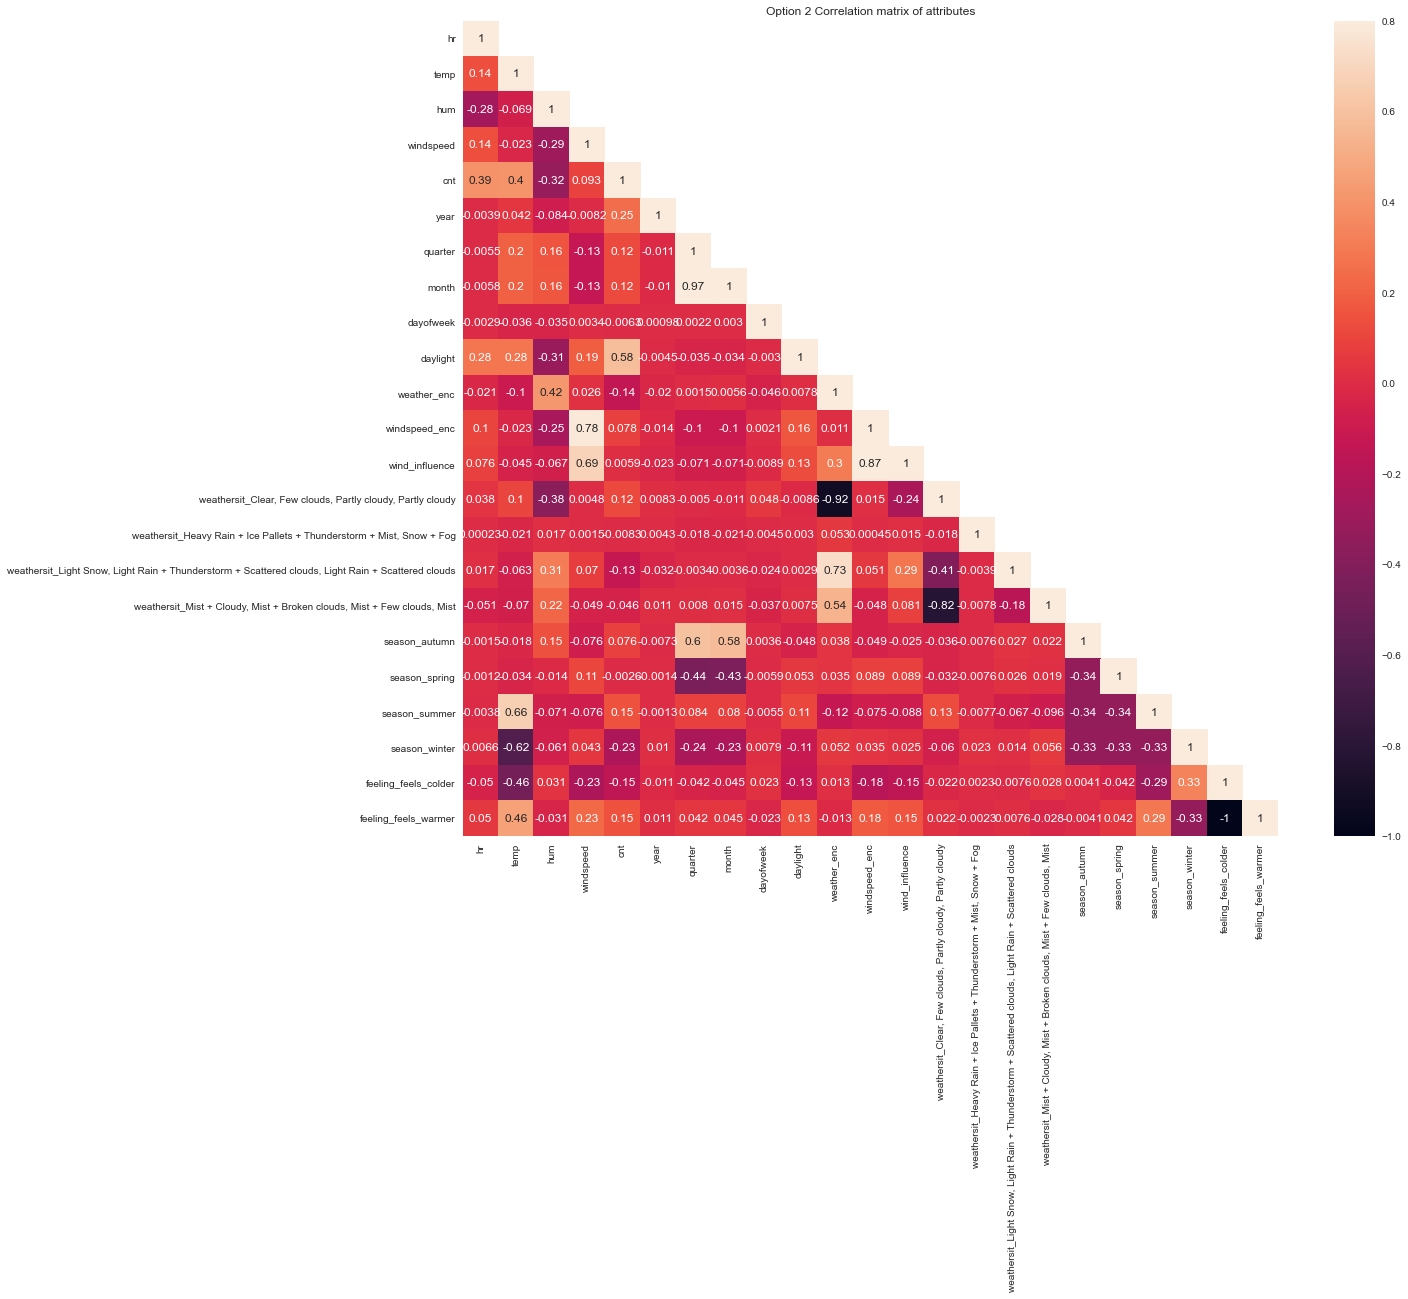

In [18]:
#Create the correlation matrix

CorrelationMatrix = data_cleaned_option2.corr()
mask = np.array(CorrelationMatrix)
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes

fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(CorrelationMatrix,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Option 2 Correlation matrix of attributes')
plt.show()

There are a lot more variables to look at in the second round of correlation analysis.

1. First and foremost, the correlation of all values to "cnt" columns is investigated as "cnt" is the target variable we are 
   trying to predict (threshold is greater than absolute value of 0.1)
    - In decreasing order, columns with positive correlation to "cnt" are: "daylight", "temp", "hr", "year", "summer", "clear", 
      "month" and "quarter"
    - In increasing order, columns with negative correlation to "cnt" are: "hum", "winter", "light snow"
    - Will drop "hum", "wind_influence" and "dayofweek" as correlations to "cnt" are too low


2. Next step is to investigate which variables are highly correlated with each other to avoid multicollinearity (treshold is 
   greater than absolute value of 0.5)
    - Columns "quarter" and "month" are extremely correlated, will only keep "quarter" as correlation of both columns to "cnt" 
      are the same but "quarter" has a smaller range and therefore can reduce complexity when predicting
    - "summer" and "winter" are respectively very positively and negatively correlated with "temp"
    - Likewise, columns "autumn" and "spring" have high correlation with "quarter"
    - It is possible between columns "temp" and "quarter", have caputured all seasonal data. Therefore, will discard columns 
      "summer", "winter", "spring" and "autumn" for prediction

Per the above analysis, columns "month", "season_summer", "season_autumn", "season_spring", "season_winter", "hum", "dayofweek", "wind_influence" will be dropped.

#### Brief look at how riders are distributed by month, day of week and day of month:

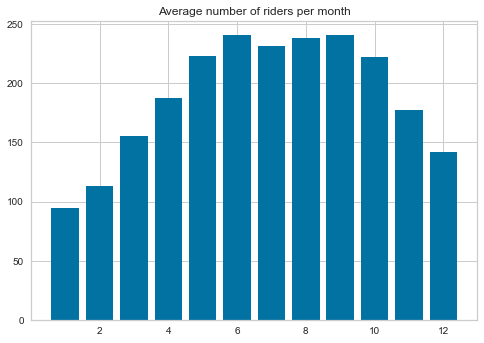

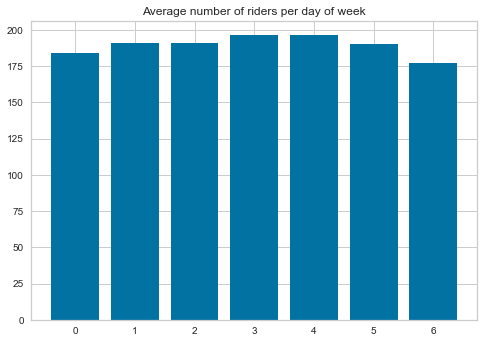

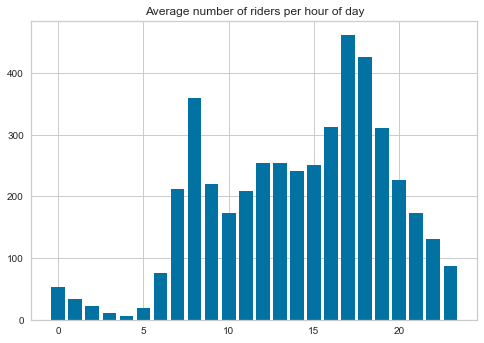

In [19]:
# Look at riders distribution by season, month and day of week

plt.bar(data_cleaned_option2.groupby('month').mean().index, data_cleaned_option2.groupby('month').mean()['cnt'])
plt.title('Average number of riders per month')
plt.show()

plt.bar(data_cleaned_option2.groupby('dayofweek').mean().index, data_cleaned_option2.groupby('dayofweek').mean()['cnt'])
plt.title('Average number of riders per day of week')
plt.show()

plt.bar(data_cleaned_option2.groupby('hr').mean().index, data_cleaned_option2.groupby('hr').mean()['cnt'])
plt.title('Average number of riders per hour of day')
plt.show()

Finally, we took a look at the distribution of number of riders in various variables to have an idea of the influence each variable might have on the prediction.

# Machine Learning (predictive analytics)

### - Choosing sensible models (linear and non-linear)
### - Tuning model parameters with cross validation
### - Optimize for R2 score
### - Plotting predictions vs. reality for additional insights

For each round, we will be running a total of four models:

The models are all regression models as this is a regression problem.

1. Linear regression models (linear, lasso L1 and ridge L2) as simple benchmark models
2. Decision Tree Regressor as a more complex model
3. Random Forest Regressor as a tree ensemble model
4. Extra Trees Regressor as a more robust ensemble model due to an added random component

In the following section, we will be running a total of four rounds of predictions:

1. Round 1: Dropped nulls, features selected by correlation, grid search/randomized search for parameters
2. Round 2: Imputed nulls, features selected by correlation, grid search/randomized search for parameters
3. Round 3: Dropped nulls, features selected by Lasso, grid search/randomized search for parameters
4. Round 4: Imputed nulls, features selected by Lasso, grid search/randomized search for parameters

#### Round 1: Dropped nulls, features selected by correlation, grid search for parameters

In [20]:
# create df to store results of models
results = pd.DataFrame(columns=['Approach', 'Accuracy'])

In [21]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option1.drop(columns=["cnt", "month", "season_summer", "season_autumn", "season_spring", "season_winter", "hum", "dayofweek", "wind_influence"]).select_dtypes(include=np.number)
y = data_cleaned_option1["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2110, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(14773, 14) (2110, 14) (14773,) (2110,)
(11079, 14) (3694, 14) (11079,) (3694,)


#### Linear Regression Models (benchmark model)

R2 score of Linear Regression is:  0.541


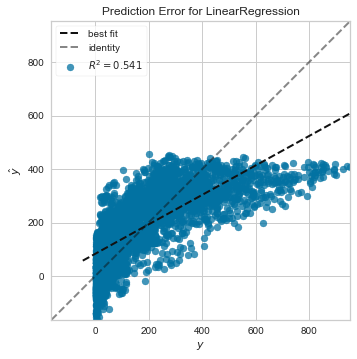

R2 score of Ridge Regression is:  0.542


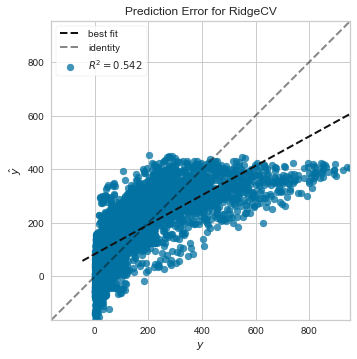

R2 score of Lasso Regression is:  0.542


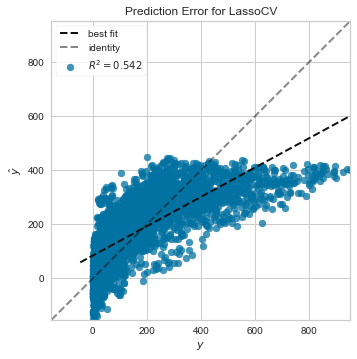

In [22]:
# Linear Regression
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_validation)
lr_score = r2_score(y_validation,lr_pred)
results.loc[len(results)] = ['Round 1 Linear Model', lr_score]
print("R2 score of Linear Regression is: ", round(lr_score,3))

visualizer = PredictionError(lr_model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data

# Predictions vs. Reality
visualizer.show()

# Ridge Regression
ridge = linear_model.RidgeCV() 
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_validation)
ridge_score = r2_score(y_validation,ridge_pred)
results.loc[len(results)] = ['Round 1 Ridge Model', ridge_score]
print("R2 score of Ridge Regression is: ", round(ridge_score,3))

visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data

# Predictions vs. Reality
visualizer.show()

#Lasso Regression
lasso = linear_model.LassoCV()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_validation)
lasso_score = r2_score(y_validation,lasso_pred)
results.loc[len(results)] = ['Round 1 Lasso Model', lasso_score]
print("R2 score of Lasso Regression is: ", round(lasso_score,3))

visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)

# Predictions vs. Reality
visualizer.show()

#### Decision Tree Regressor

Two important parameters of the decision tree regressor are: "min_samples_split" and "max_leaf_nodes".

In [23]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

dtr = DecisionTreeRegressor(random_state=42)

grid_dtr = GridSearchCV(dtr, n_jobs=-1, param_grid={"min_samples_split":list(range(2,10)),
                                                    "max_leaf_nodes":(list(range(2,11)) + list(range(20,201, 10)))},
                        cv=5, verbose=1, return_train_score=True)

grid_dtr.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(grid_dtr.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    6.3s


Best parameters set found on development set:
{'max_leaf_nodes': 110, 'min_samples_split': 9}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.8s finished


The minimum sample split and number of leaves that would produce the best R2 score is found to be 8 and 90, therefore parameter "min_samples_split" has been set to 9 and "max_leaf_nodes" has been set to 100.

R2 score of Decision Tree is:  0.741


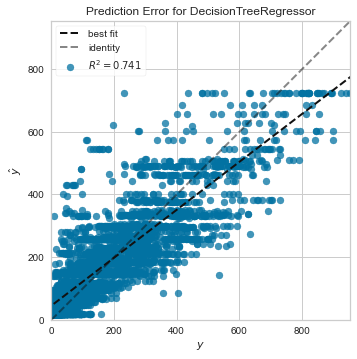

In [24]:
# 1. Load training model
dtr = DecisionTreeRegressor(random_state=42, min_samples_split=9,max_leaf_nodes=110) #same parameters as shown above

# 2. Fit the trained model
dtr.fit(x_train,y_train)

# 3. Predict based on test set
dtr_pred = dtr.predict(x_validation)

# 4. R-squared scores
dtr_score = r2_score(y_validation,dtr_pred)
results.loc[len(results)] = ['Round 1 Decision Tree Regressor', dtr_score]
print("R2 score of Decision Tree is: ", round(dtr_score,3))

visualizer = PredictionError(dtr)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)

# Predictions vs. Reality
visualizer.show()

#### Random Forest Regressor

In [26]:
# Find the most optimum number of estimators

rf = RandomForestRegressor(random_state=42)

random_rf = RandomizedSearchCV(rf, n_jobs=-1, param_distributions={"n_estimators":[5,10,20,50,100,200,300,400,500,501],
                                                        "max_depth":[150,200,250,300,350,400,450,500],
                                                         "max_features":["auto", "sqrt"]},
                        cv=5, verbose=1, return_train_score=True)  # Takes a long time to run

random_rf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.1s finished


Best parameters set found on development set:
{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 500}


We did a RandomizedSearchCV for the random forest regressor to minimize computing time. The parameters we tried were: "n_estimators", "max_depth" and "max_features".

R2 score of Random Forest is:  0.635


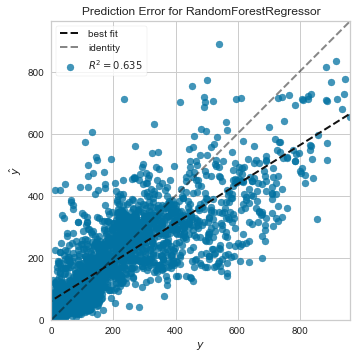

In [27]:
# 1. Load training model
rf = RandomForestRegressor(n_estimators = 500, max_features="auto", max_depth=500)

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_validation)

# 4. R-squared scores
rf_score = r2_score(y_validation,rf_pred)
results.loc[len(results)] = ['Round 1 Random Forest Regressor', rf_score]
print("R2 score of Random Forest is: ", round(rf_score,3))

visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)

# Plotting the errors
visualizer.show()

#### ExtraTrees Regressor

In [28]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

et = ExtraTreesRegressor(random_state=42)

params = {
    "max_depth": [int(x) for x in np.linspace(20, 100, num = 8)]+[None],
    "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

random_et = RandomizedSearchCV(et, param_distributions=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

random_et.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_et.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.2min finished


Best parameters set found on development set:
{'n_estimators': 2290, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 20}


R2 score of Extra Trees is:  0.767


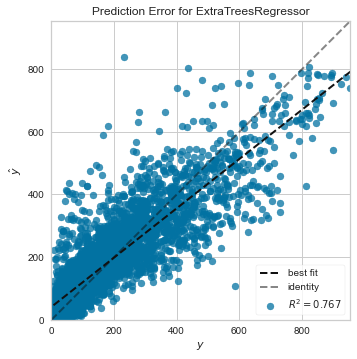

In [29]:
# 1. Load training model
et = ExtraTreesRegressor(random_state=42, n_estimators=2290, min_samples_split=6, min_samples_leaf=3, max_depth=20)

# 2. Fit the trained model
et.fit(x_train, y_train)

# 3. Predict based on test set
et_pred = et.predict(x_validation)

# 4. R-squared scores
et_score = r2_score(y_validation,et_pred)
results.loc[len(results)] = ['Round 1 Extra Trees Regressor', et_score]
print("R2 score of Extra Trees is: ", round(et_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(et)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Round 2: Imputed nulls, features selected by correlation, grid search for parameters

In [31]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option2.drop(columns=["cnt", "month", "season_summer", "season_autumn", "season_spring", "season_winter", "hum", "dayofweek", "wind_influence"]).select_dtypes(include=np.number)
y = data_cleaned_option2["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2168, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(15211, 14) (2168, 14) (15211,) (2168,)
(11408, 14) (3803, 14) (11408,) (3803,)


#### Linear Regression Model

R2 score of Linear Regression is:  0.546


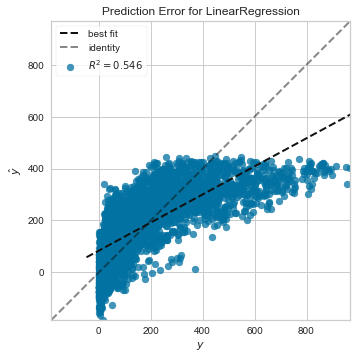

R2 score of Ridge Regression is:  0.546


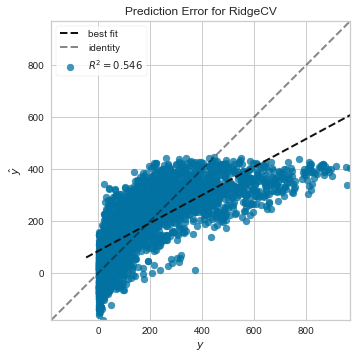

R2 score of Lasso Regression is:  0.545


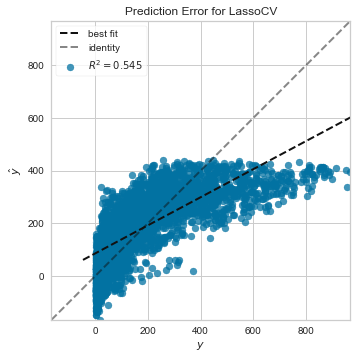

In [32]:
# Linear Regression
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_validation)
lr_score = r2_score(y_validation,lr_pred)
results.loc[len(results)] = ['Round 2 Linear Model', lr_score]
print("R2 score of Linear Regression is: ", round(lr_score,3))

visualizer = PredictionError(lr_model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Ridge Regression
ridge = linear_model.RidgeCV()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_validation)
ridge_score = r2_score(y_validation,ridge_pred)
results.loc[len(results)] = ['Round 2 Ridge Model', ridge_score]
print("R2 score of Ridge Regression is: ", round(ridge_score,3))

visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#Lasso Regression
lasso = linear_model.LassoCV()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_validation)
lasso_score = r2_score(y_validation,lasso_pred)
results.loc[len(results)] = ['Round 2 Lasso Model', lasso_score]
print("R2 score of Lasso Regression is: ", round(lasso_score,3))

visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Decision Tree Regressor

In [33]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

dtr = DecisionTreeRegressor(random_state=42)

grid_dtr = GridSearchCV(dtr, n_jobs=-1, param_grid={"min_samples_split":list(range(2,10)),
                                                    "max_leaf_nodes":(list(range(2,11)) + list(range(20,201, 10)))},
                        cv=5, verbose=1, return_train_score=True)

grid_dtr.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(grid_dtr.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    4.5s finished


Best parameters set found on development set:
{'max_leaf_nodes': 130, 'min_samples_split': 8}


R2 score of Decision Tree is:  0.752


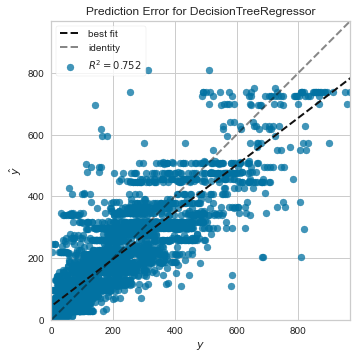

In [34]:
# 1. Load training model
dtr = DecisionTreeRegressor(min_samples_split=8,max_leaf_nodes=130) #Same parameters as shown above

# 2. Fit the trained model
dtr.fit(x_train,y_train)

# 3. Predict based on test set
dtr_pred = dtr.predict(x_validation)

# 4. R-squared scores
dtr_score = r2_score(y_validation,dtr_pred)
results.loc[len(results)] = ['Round 2 Decision Tree Regressor', dtr_score]
print("R2 score of Decision Tree is: ", round(dtr_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(dtr)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Random Forest Regressor

In [35]:
# Find the most optimum number of estimators

rf = RandomForestRegressor(random_state=42)

random_rf = RandomizedSearchCV(rf, n_jobs=-1, param_distributions={"n_estimators":[5,10,20,50,100,200,300,400,500,501],
                                                        "max_depth":[150,200,250,300,350,400,450,500],
                                                         "max_features":["auto", "sqrt"]},
                        cv=5, verbose=1, return_train_score=True)  # Takes a long time to run

random_rf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.0s finished


Best parameters set found on development set:
{'n_estimators': 501, 'max_features': 'auto', 'max_depth': 400}


R2 score of Random Forest is:  0.636


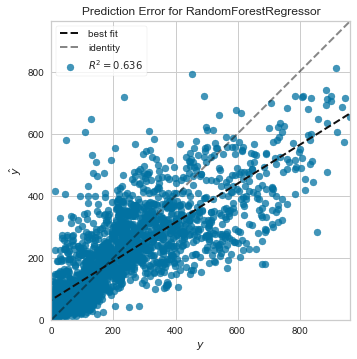

In [36]:
# 1. Load training model
rf = RandomForestRegressor(random_state=42, n_estimators = 501, max_depth=400, max_features="auto")

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_validation)

# 4. R-squared scores
rf_score = r2_score(y_validation,rf_pred)
results.loc[len(results)] = ['Round 2 Random Forest Regressor', rf_score]
print("R2 score of Random Forest is: ", round(rf_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### ExtraTrees Regressor

In [37]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

et = ExtraTreesRegressor(random_state=42)

params = {
    "max_depth": [int(x) for x in np.linspace(20, 100, num = 8)]+[None],
    "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

random_et = RandomizedSearchCV(et, param_distributions=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

random_et.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_et.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.5min finished


Best parameters set found on development set:
{'n_estimators': 580, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 20}


R2 score of Extra Trees is:  0.768


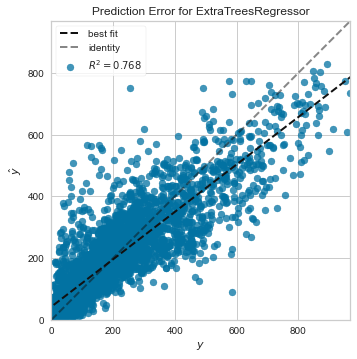

In [38]:
# 1. Load training model
et = ExtraTreesRegressor(random_state=42, max_depth=20, n_estimators=580, min_samples_split=6, min_samples_leaf=3)

# 2. Fit the trained model
et.fit(x_train, y_train)

# 3. Predict based on test set
et_pred = et.predict(x_validation)

# 4. R-squared scores
et_score = r2_score(y_validation,et_pred)
results.loc[len(results)] = ['Round 2 Extra Trees Regressor', et_score]
print("R2 score of Extra Trees is: ", round(et_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(et)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Round 3: Dropped nulls, features selected by shrinkage methods, grid search on parameters

In [39]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option1.drop(columns=["cnt"])
y = data_cleaned_option1["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2110, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(14773, 22) (2110, 22) (14773,) (2110,)
(11079, 22) (3694, 22) (11079,) (3694,)


In [40]:
# Apply lasso method to look for relevant features

alphas = 10**np.linspace(-1,-4,100)

lasso = linear_model.LassoCV(alphas=alphas,n_jobs=-1, verbose=True).fit(x_train, y_train)

model = SelectFromModel(lasso, prefit=True)
new_X = model.transform(x_train) 
val_new_X = model.transform(x_validation)
print("Original Number of Features = {} --> Number of features selected by Lasso = {}".format(x_train.shape[1], new_X.shape[1]))
columns_lasso = x_train.columns[model.get_support()]
print(columns_lasso)

# Only use selected features to do all training of models

x_train = x_train.loc[:,columns_lasso]
x_validation = x_validation.loc[:,columns_lasso]
x_test = x_test.loc[:,columns_lasso]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Original Number of Features = 22 --> Number of features selected by Lasso = 20
Index(['hr', 'temp', 'hum', 'windspeed', 'year', 'quarter', 'month',
       'dayofweek', 'daylight', 'weather_enc', 'windspeed_enc',
       'wind_influence',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'feeling_feels_colder'],
      dtype='object')


#### Linear Regression Models

R2 score of Linear Regression is:  0.563


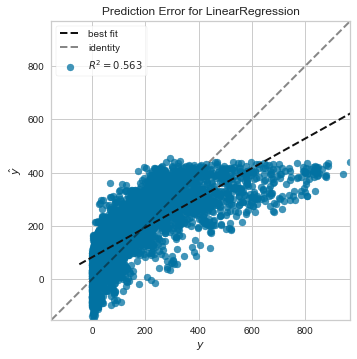

R2 score of Ridge Regression is:  0.563


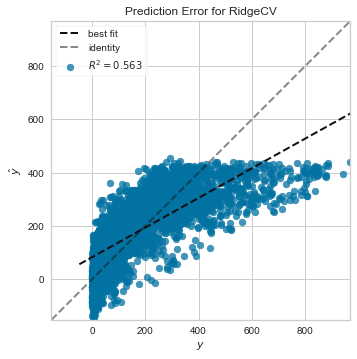

R2 score of Lasso Regression is:  0.56


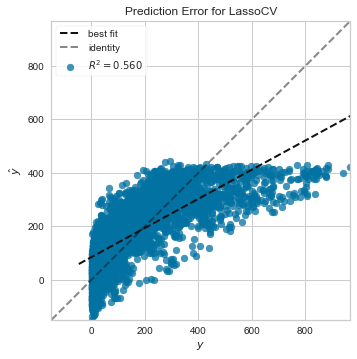

In [41]:
# Linear Regression
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_validation)
lr_score = r2_score(y_validation,lr_pred)
results.loc[len(results)] = ['Round 3 Linear Model', lr_score]
print("R2 score of Linear Regression is: ", round(lr_score,3))

visualizer = PredictionError(lr_model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Ridge Regression
ridge = linear_model.RidgeCV()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_validation)
ridge_score = r2_score(y_validation,ridge_pred)
results.loc[len(results)] = ['Round 3 Ridge Model', ridge_score]
print("R2 score of Ridge Regression is: ", round(ridge_score,3))

visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#Lasso Regression
lasso = linear_model.LassoCV()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_validation)
lasso_score = r2_score(y_validation,lasso_pred)
results.loc[len(results)] = ['Round 3 Lasso Model', lasso_score]
print("R2 score of Lasso Regression is: ", round(lasso_score,3))

visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Decision Tree Regressor

In [42]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

dtr = DecisionTreeRegressor(random_state=42)

grid_dtr = GridSearchCV(dtr, n_jobs=-1, param_grid={"min_samples_split":list(range(2,10)),
                                                    "max_leaf_nodes":(list(range(2,11)) + list(range(20,201, 10)))},
                        cv=5, verbose=1, return_train_score=True)

grid_dtr.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(grid_dtr.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:    5.9s


Best parameters set found on development set:
{'max_leaf_nodes': 200, 'min_samples_split': 9}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    6.2s finished


R2 score of Decision Tree is:  0.885


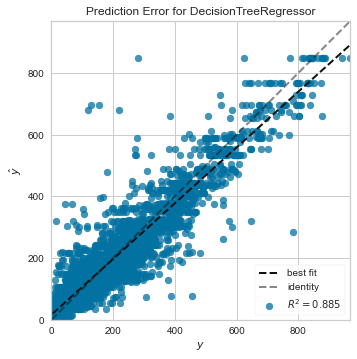

In [43]:
# 1. Load training model
dtr = DecisionTreeRegressor(min_samples_split=9, max_leaf_nodes=200) #Same parameters as shown above

# 2. Fit the trained model
dtr.fit(x_train,y_train)

# 3. Predict based on test set
dtr_pred = dtr.predict(x_validation)

# 4. R-squared scores
dtr_score = r2_score(y_validation,dtr_pred)
results.loc[len(results)] = ['Round 3 Decision Tree Regressor', dtr_score]
print("R2 score of Decision Tree is: ", round(dtr_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(dtr)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Random Forest Regressor

In [45]:
# Find the most optimum number of estimators

rf = RandomForestRegressor(random_state=42)

random_rf = RandomizedSearchCV(rf, n_jobs=-1, param_distributions={"n_estimators":[5,10,20,50,100,200,300,400,500,501],
                                                        "max_depth":[150,200,250,300,350,400,450,500],
                                                         "max_features":["auto", "sqrt"]},
                        cv=5, verbose=1, return_train_score=True)  # Takes a long time to run

random_rf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.4s finished


Best parameters set found on development set:
{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 400}


R2 score of Random Forest is:  0.935


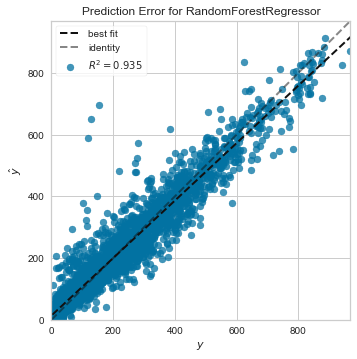

In [47]:
# 1. Load training model
rf = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=400, max_features="auto") #same as above

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_validation)

# 4. R-squared scores
rf_score = r2_score(y_validation,rf_pred)
results.loc[len(results)] = ['Round 3 Random Forest Regressor', rf_score]
print("R2 score of Random Forest is: ", round(rf_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### ExtraTrees Regressor

In [48]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

et = ExtraTreesRegressor(random_state=42)

params = {
    "max_depth": [int(x) for x in np.linspace(20, 100, num = 8)]+[None],
    "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

random_et = RandomizedSearchCV(et, param_distributions=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

random_et.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_et.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.8min finished


Best parameters set found on development set:
{'n_estimators': 3430, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': None}


R2 score of Extra Trees is:  0.932


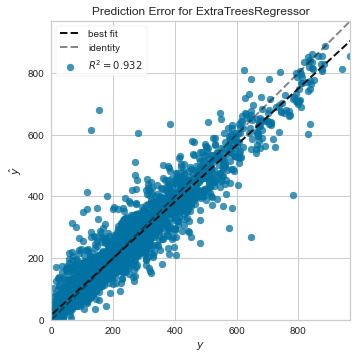

In [49]:
# 1. Load training model
et = ExtraTreesRegressor(random_state=42, max_depth=None, n_estimators=3430, min_samples_split=6, min_samples_leaf=1)

# 2. Fit the trained model
et.fit(x_train, y_train)

# 3. Predict based on test set
et_pred = et.predict(x_validation)

# 4. R-squared scores
et_score = r2_score(y_validation,et_pred)
results.loc[len(results)] = ['Round 3 Extra Trees Regressor', et_score]
print("R2 score of Extra Trees is: ", round(et_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(et)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Scenario 4: Imputed nulls, features selected by shrinkage methods, grid search on parameters

In [79]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option2.drop(columns=["cnt"])
y = data_cleaned_option2["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2168, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(15211, 22) (2168, 22) (15211,) (2168,)
(11408, 22) (3803, 22) (11408,) (3803,)


In [80]:
# Apply lasso method to look for relevant features

alphas = 10**np.linspace(-1,-4,100)

lasso = linear_model.LassoCV(random_state=2, alphas=alphas,n_jobs=-1, verbose=True).fit(x_train, y_train)

model = SelectFromModel(lasso, prefit=True)
new_X = model.transform(x_train) 
val_new_X = model.transform(x_validation)
print("Original Number of Features = {} --> Number of features selected by Lasso = {}".format(x_train.shape[1], new_X.shape[1]))
columns_lasso = x_train.columns[model.get_support()]
print(columns_lasso)

# Only use selected features to do all training of models

x_train = x_train.loc[:,columns_lasso]
x_validation = x_validation.loc[:,columns_lasso]
x_test = x_test.loc[:,columns_lasso]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
..[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Original Number of Features = 22 --> Number of features selected by Lasso = 18
Index(['hr', 'temp', 'hum', 'windspeed', 'year', 'quarter', 'month',
       'dayofweek', 'daylight', 'weather_enc', 'windspeed_enc',
       'wind_influence',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'feeling_feels_colder'],
      dtype='object')


#### Linear Regression Models

R2 score of Linear Regression is:  0.557


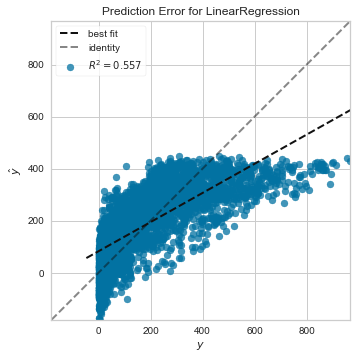

R2 score of Ridge Regression is:  0.557


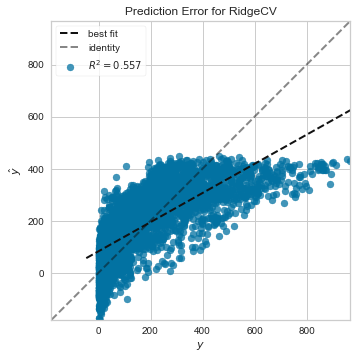

R2 score of Lasso Regression is:  0.557


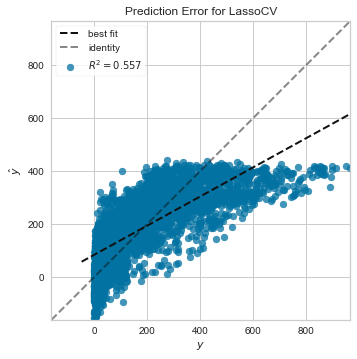

In [52]:
# Linear Regression
lr_model = linear_model.LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_validation)
lr_score = r2_score(y_validation,lr_pred)
results.loc[len(results)] = ['Round 4 Linear Model', lr_score]
print("R2 score of Linear Regression is: ", round(lr_score,3))

visualizer = PredictionError(lr_model)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Ridge Regression
ridge = linear_model.RidgeCV()
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_validation)
ridge_score = r2_score(y_validation,ridge_pred)
results.loc[len(results)] = ['Round 4 Ridge Model', ridge_score]
print("R2 score of Ridge Regression is: ", round(ridge_score,3))

visualizer = PredictionError(ridge)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_validation, y_validation)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#Lasso Regression
lasso = linear_model.LassoCV()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_validation)
lasso_score = r2_score(y_validation,lasso_pred)
results.loc[len(results)] = ['Round 4 Lasso Model', lasso_score]
print("R2 score of Lasso Regression is: ", round(lasso_score,3))

visualizer = PredictionError(lasso)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Decision Tree Regressor

In [53]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

dtr = DecisionTreeRegressor(random_state=42)

grid_dtr = GridSearchCV(dtr, n_jobs=-1, param_grid={"min_samples_split":list(range(2,10)),
                                                    "max_leaf_nodes":(list(range(2,11)) + list(range(20,201, 10)))},
                        cv=5, verbose=1, return_train_score=True)

grid_dtr.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(grid_dtr.best_params_)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.5s


Best parameters set found on development set:
{'max_leaf_nodes': 200, 'min_samples_split': 9}


[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:   10.6s finished


R2 score of Decision Tree is:  0.89


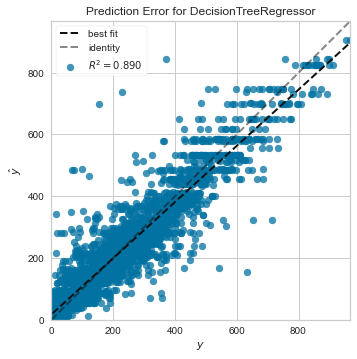

In [54]:
# 1. Load training model
dtr = DecisionTreeRegressor(min_samples_split=9, max_leaf_nodes=200) #Same parameters as shown above

# 2. Fit the trained model
dtr.fit(x_train,y_train)

# 3. Predict based on test set
dtr_pred = dtr.predict(x_validation)

# 4. R-squared scores
dtr_score = r2_score(y_validation,dtr_pred)
results.loc[len(results)] = ['Round 4 Decision Tree Regressor', dtr_score]
print("R2 score of Decision Tree is: ", round(dtr_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(dtr)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### Random Forest Regressor

In [55]:
# Find the most optimum number of estimators

rf = RandomForestRegressor(random_state=42)

random_rf = RandomizedSearchCV(rf, n_jobs=-1, param_distributions={"n_estimators":[5,10,20,50,100,200,300,400,500,501],
                                                        "max_depth":[150,200,250,300,350,400,450,500],
                                                         "max_features":["auto", "sqrt"]},
                        cv=5, verbose=1, return_train_score=True)  # Takes a long time to run

random_rf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


Best parameters set found on development set:
{'n_estimators': 500, 'max_features': 'auto', 'max_depth': 400}


R2 score of Random Forest is:  0.934


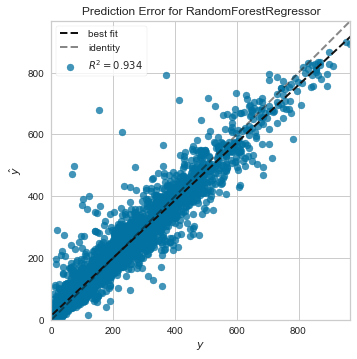

In [56]:
# 1. Load training model
rf = RandomForestRegressor(random_state=42, n_estimators = 500, max_depth=400, max_features="auto")

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_validation)

# 4. R-squared scores
rf_score = r2_score(y_validation,rf_pred)
results.loc[len(results)] = ['Round 4 Random Forest Regressor', rf_score]
print("R2 score of Random Forest is: ", round(rf_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(rf)
visualizer.fit(x_validation, y_validation)
visualizer.score(x_validation, y_validation)
visualizer.show()

#### ExtraTrees Regressor

In [57]:
# Find the most optimum number of sample split and leaf nodes for the  decision tree

et = ExtraTreesRegressor(random_state=42)

params = {
    "max_depth": [int(x) for x in np.linspace(20, 100, num = 8)]+[None],
    "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}

random_et = RandomizedSearchCV(et, param_distributions=params, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

random_et.fit(x_train, y_train)

print("Best parameters set found on development set:")
print(random_et.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.3min finished


Best parameters set found on development set:
{'n_estimators': 3430, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 65}


R2 score of Extra Trees is:  0.933


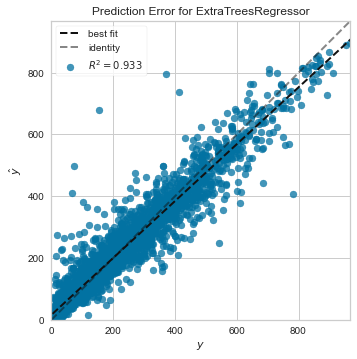

In [58]:
# 1. Load training model
et = ExtraTreesRegressor(random_state=42, max_depth=65, n_estimators=3430, min_samples_split=4, min_samples_leaf=1)

# 2. Fit the trained model
et.fit(x_train, y_train)

# 3. Predict based on test set
et_pred = et.predict(x_validation)

# 4. R-squared scores
et_score = r2_score(y_validation,et_pred)
results.loc[len(results)] = ['Round 4 Extra Trees Regressor', et_score]
print("R2 score of Extra Trees is: ", round(et_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(et)
visualizer.fit(x_train, y_train)
visualizer.score(x_validation, y_validation)
visualizer.show()

In [61]:
results.sort_values("Accuracy", ascending=False)

,Approach,Accuracy
16,Round 3 Random Forest Regressor,0.934549
22,Round 4 Random Forest Regressor,0.934473
23,Round 4 Extra Trees Regressor,0.933139
17,Round 3 Extra Trees Regressor,0.932395
21,Round 4 Decision Tree Regressor,0.889652
15,Round 3 Decision Tree Regressor,0.884996
11,Round 2 Extra Trees Regressor,0.768259
5,Round 1 Extra Trees Regressor,0.767196
9,Round 2 Decision Tree Regressor,0.751515
3,Round 1 Decision Tree Regressor,0.741186


As seen above, rounds 3 and 4 have the best results due to the combination of Lasso feature selection as well as GridSearch/RandomizedSearch.

For the final testing on the test sets, we will take the top 3 best models in case of overfitting.

Models we will be doing the final testing:

1. Round 3 Random Forest Regressor
2. Round 4 Random Forest Regressor
3. Round 4 Extra Trees Regressor

#### 1. Round 3 Random Forest Regressor

In [84]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option1.drop(columns=["cnt"])
y = data_cleaned_option1["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2110, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(14773, 22) (2110, 22) (14773,) (2110,)
(11079, 22) (3694, 22) (11079,) (3694,)


In [85]:
# Apply lasso method to look for relevant features

alphas = 10**np.linspace(-1,-4,100)

lasso = linear_model.LassoCV(alphas=alphas,n_jobs=-1, verbose=True).fit(x_train, y_train)

model = SelectFromModel(lasso, prefit=True)
new_X = model.transform(x_train) 
val_new_X = model.transform(x_validation)
print("Original Number of Features = {} --> Number of features selected by Lasso = {}".format(x_train.shape[1], new_X.shape[1]))
columns_lasso = x_train.columns[model.get_support()]
print(columns_lasso)

# Only use selected features to do all training of models

x_train = x_train.loc[:,columns_lasso]
x_validation = x_validation.loc[:,columns_lasso]
x_test = x_test.loc[:,columns_lasso]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Original Number of Features = 22 --> Number of features selected by Lasso = 18
Index(['hr', 'temp', 'hum', 'windspeed', 'year', 'quarter', 'month',
       'dayofweek', 'daylight', 'weather_enc', 'windspeed_enc',
       'wind_influence',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'feeling_feels_colder'],
      dtype='object')


R2 score of Random Forest is:  0.826


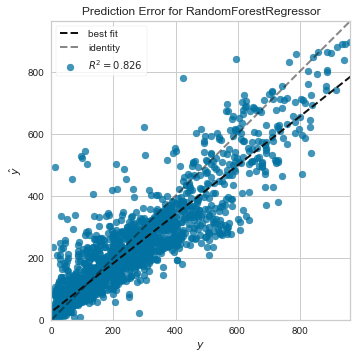

In [86]:
# 1. Load training model
rf = RandomForestRegressor(random_state=42, n_estimators=300, max_depth=400, max_features="auto") #same as above

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_test)

# 4. R-squared scores
rf_score = r2_score(y_test,rf_pred)

print("R2 score of Random Forest is: ", round(rf_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

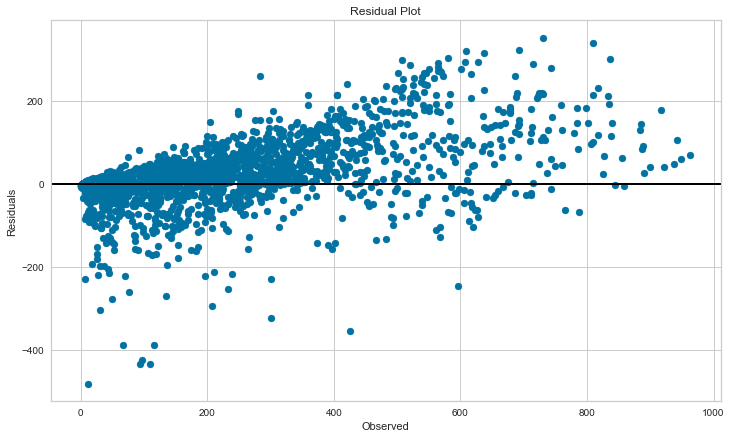

In [87]:
#Residual plot
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, y_test-rf_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

#### 2. Round 4 Random Forest Regressor

In [88]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option2.drop(columns=["cnt"])
y = data_cleaned_option2["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2168, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(15211, 22) (2168, 22) (15211,) (2168,)
(11408, 22) (3803, 22) (11408,) (3803,)


In [89]:
# Apply lasso method to look for relevant features

alphas = 10**np.linspace(-1,-4,100)

lasso = linear_model.LassoCV(alphas=alphas,n_jobs=-1, verbose=True).fit(x_train, y_train)

model = SelectFromModel(lasso, prefit=True)
new_X = model.transform(x_train) 
val_new_X = model.transform(x_validation)
print("Original Number of Features = {} --> Number of features selected by Lasso = {}".format(x_train.shape[1], new_X.shape[1]))
columns_lasso = x_train.columns[model.get_support()]
print(columns_lasso)

# Only use selected features to do all training of models

x_train = x_train.loc[:,columns_lasso]
x_validation = x_validation.loc[:,columns_lasso]
x_test = x_test.loc[:,columns_lasso]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Original Number of Features = 22 --> Number of features selected by Lasso = 19
Index(['hr', 'temp', 'hum', 'windspeed', 'year', 'quarter', 'month',
       'dayofweek', 'daylight', 'weather_enc', 'windspeed_enc',
       'wind_influence',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_autumn', 'season_spring', 'season_summer', 'season_winter',
       'feeling_feels_colder'],
      dtype='object')


R2 score of Random Forest is:  0.833


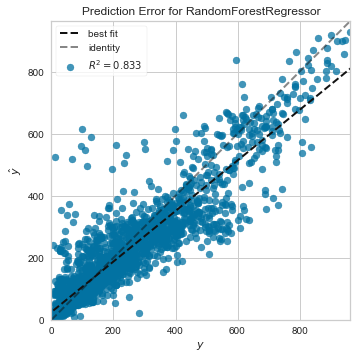

In [90]:
# 1. Load training model
rf = RandomForestRegressor(random_state=42, n_estimators = 500, max_depth=400, max_features="auto")

# 2. Fit the trained model
rf.fit(x_train,y_train)

# 3. Predict based on test set
rf_pred = rf.predict(x_test)

# 4. R-squared scores
rf_score = r2_score(y_test,rf_pred)

print("R2 score of Random Forest is: ", round(rf_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(rf)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

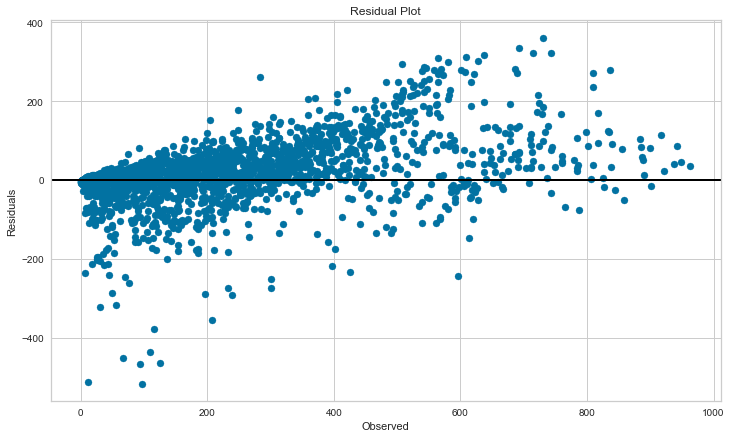

In [91]:
#Residual plot
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, y_test-rf_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

#### 3. Round 4 Extra Trees Regressor

In [92]:
# Split dataset into train (2011 to 2012Q3) and test (2012Q4) sets per assignment requirements

x = data_cleaned_option2.drop(columns=["cnt"])
y = data_cleaned_option2["cnt"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=2168, shuffle=False)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Further split train dataset into train and validation sets
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train)

print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(15211, 22) (2168, 22) (15211,) (2168,)
(11408, 22) (3803, 22) (11408,) (3803,)


In [93]:
# Apply lasso method to look for relevant features

alphas = 10**np.linspace(-1,-4,100)

lasso = linear_model.LassoCV(random_state=2, alphas=alphas,n_jobs=-1, verbose=True).fit(x_train, y_train)

model = SelectFromModel(lasso, prefit=True)
new_X = model.transform(x_train) 
val_new_X = model.transform(x_validation)
print("Original Number of Features = {} --> Number of features selected by Lasso = {}".format(x_train.shape[1], new_X.shape[1]))
columns_lasso = x_train.columns[model.get_support()]
print(columns_lasso)

# Only use selected features to do all training of models

x_train = x_train.loc[:,columns_lasso]
x_validation = x_validation.loc[:,columns_lasso]
x_test = x_test.loc[:,columns_lasso]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Original Number of Features = 22 --> Number of features selected by Lasso = 19
Index(['hr', 'temp', 'hum', 'windspeed', 'year', 'quarter', 'month',
       'dayofweek', 'daylight', 'weather_enc', 'windspeed_enc',
       'wind_influence',
       'weathersit_Clear, Few clouds, Partly cloudy, Partly cloudy',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'season_autumn', 'season_spring', 'season_summer',
       'feeling_feels_colder'],
      dtype='object')


R2 score of Extra Trees is:  0.787


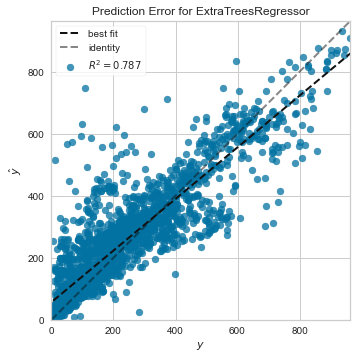

In [94]:
# 1. Load training model
et = ExtraTreesRegressor(random_state=42, max_depth=88, n_estimators=4000, min_samples_split=4, min_samples_leaf=1)

# 2. Fit the trained model
et.fit(x_train, y_train)

# 3. Predict based on test set
et_pred = et.predict(x_test)

# 4. R-squared scores
et_score = r2_score(y_test,et_pred)
results.loc[len(results)] = ['Round 4 Extra Trees Regressor', et_score]
print("R2 score of Extra Trees is: ", round(et_score,3))

# Plot prediction vs. actual values
visualizer = PredictionError(et)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

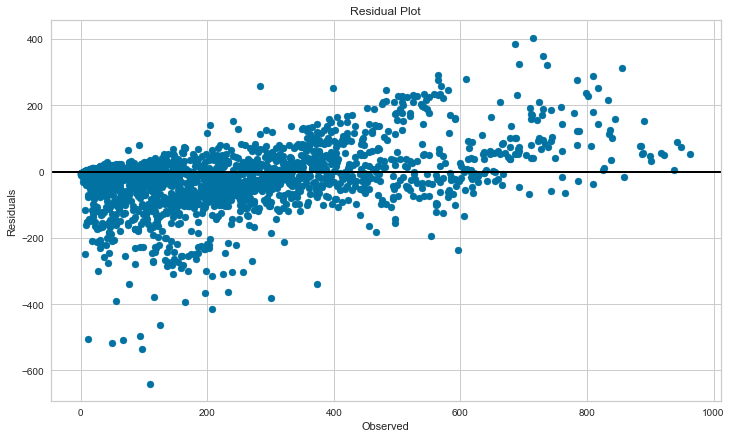

In [95]:
#Residual plot
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(y_test, y_test-et_pred)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

In the end, the best score we obtained was on the **Random Forest Regressor** with imputed null values, feature selection with lasso and grid search for the parameters. The final score was **83.3%** on the test set.

This was surprising as we expected Extra Trees to perform the best.

We also plotted the residuals to show how our predictions compared to the actual values. The range of variance is quite large at around -600 to 400 showing that there is still a lot of room for improvement with our predictions.

To that point, we would like to share some of the limitations during our calculations and things we would do differently next time under lesser constraints:


Future outlook:
- We were pressured to use RandomSearchCV for the sake of reducing the runtime of algorithms instead of the more 
  encompassing GridSearchCV
- We could have done a more creative imputation of null values instead of just imputing with median and mode values
- We could have done a deeper investigation into the outliers and tried to normalize them more

#### Pipeline Attempts

In [1]:
#steps = [('DecisionTree', DecisionTreeRegressor(random_state=42, n_jobs=-1, cv=5, verbose=1, return_train_score=True)),
        #('RandomForest', RandomForestRegressor(random_state=42, n_jobs=-1, cv=5, verbose=1, return_train_score=True)),
        #('ExtraTrees', ExtraTreesRegressor(random_state=42, cv=5, verbose=1, n_jobs=-1, return_train_score=True))]

#steps = [('DecisionTree', DecisionTreeRegressor()),
        #('RandomForest', RandomForestRegressor()),
        #('ExtraTrees', ExtraTreesRegressor())]

#parameters = {'DecisionTree__min_samples_split':[list(range(2,10))],
             #'DecisionTree__max_leaf_nodes':[(list(range(2,11)) + list(range(20,201, 10)))],
             #'RandomForest__n_estimators':[5,10,20,50,100,200,300,400,500,501],
             #'RandomForest__max_depth':[150,200,250,300,350,400,450,500],
             #'RandomForest__max_features':["auto", "sqrt"],
             #'ExtraTrees__max_depth':[int(x) for x in np.linspace(20, 100, num = 8)]+[None],
             #'ExtraTrees__n_estimators':[int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
             #'ExtraTrees__min_samples_split':[2, 4, 6],
             #'ExtraTrees__min_samples_leaf':[1, 2, 3]
             #}

#pipeline = Pipeline(steps)

#grid = RandomizedSearchCV(pipeline, param_distributions=parameters, random_state=42, n_jobs=-1, cv=5, verbose=1, return_train_score=True)

In [ ]:
# Timed out

pipeline = Pipeline([
    ("regression", linear_model.LinearRegression())
])

param_grid = {
    "regression": [
        linear_model.LinearRegression(),
        GridSearchCV(DecisionTreeRegressor(random_state=42), n_jobs=-1, param_grid={"min_samples_split":list(range(2,10)),
                                                    "max_leaf_nodes":(list(range(2,11)) + list(range(20,201, 10)))},
                        cv=5, verbose=1, return_train_score=True),
        RandomizedSearchCV(RandomForestRegressor(random_state=42), n_jobs=-1, param_distributions={"n_estimators":[5,10,20,50,100,200,300,400,500,501],
                                                        "max_depth":[150,200,250,300,350,400,450,500],
                                                         "max_features":["auto", "sqrt"]},
                        cv=5, verbose=1, return_train_score=True),
        RandomizedSearchCV(ExtraTreesRegressor(random_state=42), param_distributions={
    "max_depth": [int(x) for x in np.linspace(20, 100, num = 8)]+[None],
    "n_estimators": [int(x) for x in np.linspace(start = 10, stop = 4000, num = 8)],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 3]
}, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
    ],
}

gs = GridSearchCV(pipeline, param_grid)

gs.fit(x_train, y_train)

#param_grid

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1105 out of 1120 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1105 out of 1120 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   56.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   37.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   42.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.7min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.6min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.3min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
